In [167]:
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from SynDataFunctionality.genInputFromLabel import std_gauss_filter


In [168]:
bg_test_path = r"Z:\dikuAngiograms\Projects\Jeppe Filippa Spring 2023\02\Backgrounds\test_background_0.tiff"
bg = skimage.io.imread(bg_test_path)

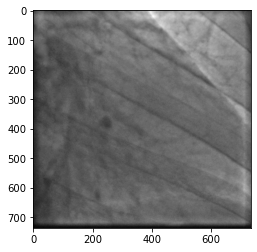

In [169]:
plt.imshow(bg, cmap="gray")

In [176]:
artery_path = r"C:\Users\nugni\OneDrive\Skrivebord\Bachelor\git\Bachelor_rep_angiograms\src\SynData\SynLabel\lab_3.tiff"
artery = skimage.io.imread(artery_path)

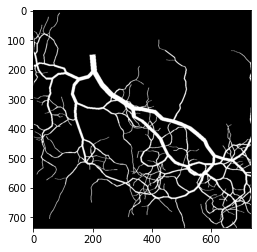

In [177]:
plt.imshow(artery, cmap="gray")

In [189]:
blurred_art = gaussian_filter(np.array(artery, dtype="float"), std_gauss_filter)

1.0


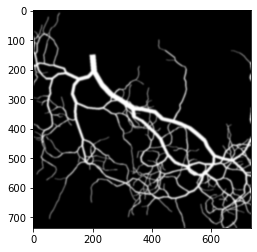

In [190]:
scaled_blur_art = scale_img(blurred_art)
plt.imshow(scaled_blur_art, cmap="gray")
print(np.max(scaled_blur_art))

In [180]:
artcol = 45
noise_std = 21
noise_mask = np.random.normal(0, np.sqrt(21), (736, 736))

#plt.imshow(noise_mask)

In [181]:
noise_map = np.zeros((736, 736))
for i in range(736):
    for j in range(736):
        noise_map[i, j] = scaled_blur_art[i, j]*noise_mask[i, j]

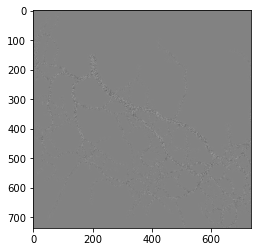

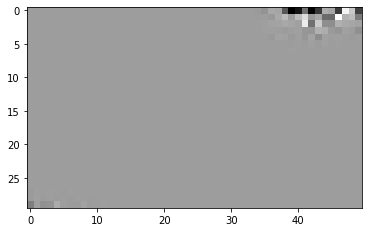

In [182]:
plt.imshow(noise_map, cmap="gray")
plt.show()
plt.imshow(noise_map[350:380, 0:50], cmap='gray')

In [183]:
ret_img = np.zeros((736, 736))
for i in range(736):
    for j in range(736):
        ret_img[i, j] = bg[i, j]*(1-scaled_blur_art[i, j]) + (artcol*scaled_blur_art[i, j]+noise_map[i, j])

In [184]:
img_to_compare_path = r"Z:\dikuAngiograms\Projects\Jeppe Filippa Spring 2023\02\Data\Orig\IMG00004_35.tiff"
img_to_compare = skimage.io.imread(img_to_compare_path)

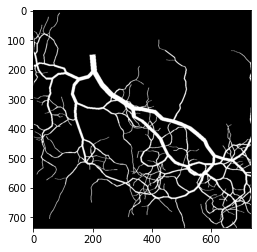

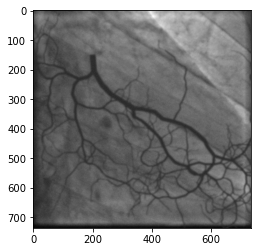

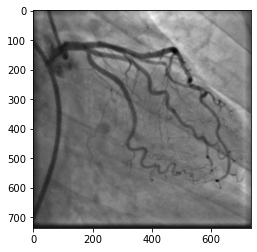

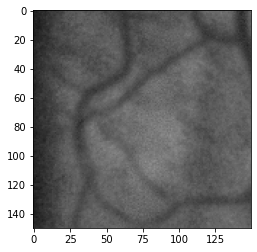

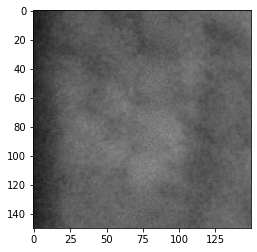

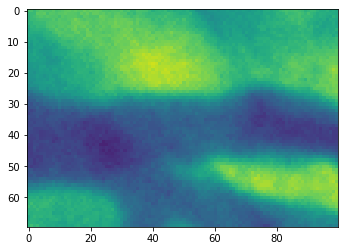

In [186]:
plt.imshow(artery, cmap="gray", vmin=0, vmax=1)
plt.show()
plt.imshow(ret_img, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(img_to_compare, cmap="gray", vmin=0, vmax=255)
plt.show()
plt.imshow(ret_img[350:500, 0:150], vmin=10, vmax=200, cmap="gray")
plt.show()
plt.imshow(bg[350:500, 0:150], vmin=10, vmax=200, cmap="gray")
plt.show()
plt.imshow(img_to_compare[80:150, 150:250], vmin=10, vmax=200)